<a href="https://colab.research.google.com/github/ioloi1128/CDA/blob/main/CDA_week5_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [30]:
#creat a idealized case
x = np.random.normal(5.0,0.5,300) # (mean, std. deviation, N)
m = 3
b = 60
noise=np.random.normal(5,1.0,300)
y = m * x + b + noise

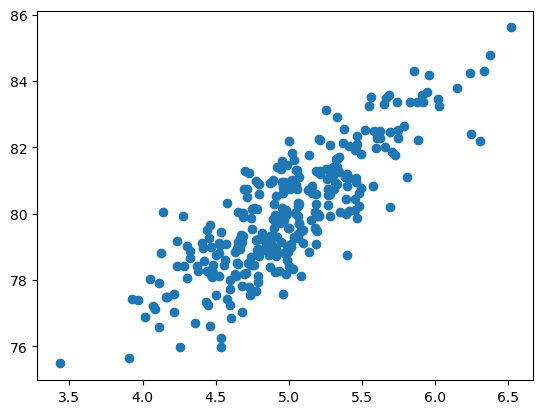

In [31]:
plt.scatter(x,y)

In [32]:
[m_fit,b_fit]=np.polyfit(x,y,1)
print(b_fit,m_fit)

64.57899688300276 3.0892763930001754


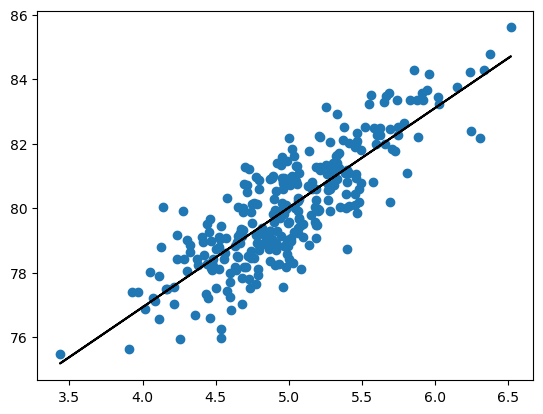

In [33]:
y_fit=m_fit*x+b_fit
plt.scatter(x,y)
plt.plot(x,y_fit,'k-')

In [34]:
#R-Squared
y_res=y_fit-y
r_squared=1-(np.var(y_res)/np.var(y))
r_squared

0.6989069613406933

In [35]:
#scipy
from scipy.stats import linregress

In [36]:
slope, intercept, r_value, p_value, std_err = linregress(x, y)

In [37]:
slope,intercept,r_value,p_value, std_err

(3.0892763930001776,
 64.57899688300276,
 0.8360065558000687,
 1.1696150237569651e-79,
 0.11745981375924064)

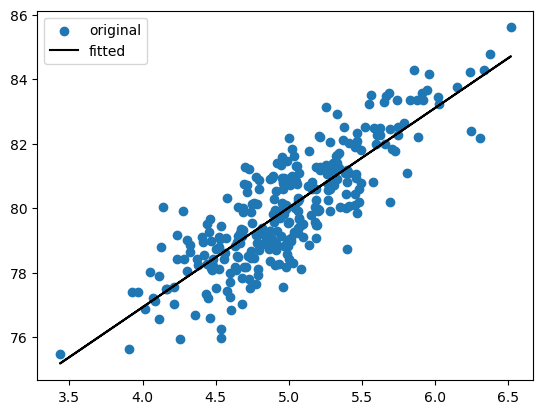

In [38]:
plt.scatter(x, y)
plt.plot(x, intercept + slope*x, 'k')
plt.legend(['original','fitted'])

In [39]:
r_sq=r_value**2
r_sq

0.6989069613406933

In [40]:
#fitting for no meaningful
y_rand=np.random.randn(len(x)) 
[m_fit_rand,b_fit_rand]=np.polyfit(x,y_rand,1)
y_fit_rand=m_fit_rand*x+b_fit_rand
print(b_fit_rand,m_fit_rand)

-0.8538509249669912 0.17338467256973705


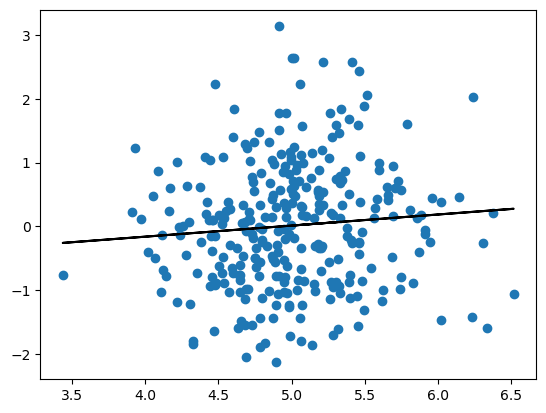

In [41]:
plt.scatter(x,y_rand)
plt.plot(x,y_fit_rand,'k-')

In [42]:
y_res_rand=y_rand-y_fit_rand
r_squared_rand=1-(np.var(y_res_rand)/np.var(y_rand))
r_squared_rand

0.007450068452676373

The application of linear trend on climate data: Trend

In [43]:
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds = xr.open_dataset(url)
#print(ds)
#ds

# select period
ds = ds.sel(time=slice('1960', '2020'))
ds

#actually load the data
ds.load()

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 732, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2020-12-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
    sst        (time, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
Attributes: (12/39)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    data_modified:                   2023-04-04
    DODS_EXTRA.Unlimited_Dimension:  time

In [44]:
#make anomaly
sst_clim = ds.sst.groupby('time.month').mean(dim='time')
sst_anom = ds.sst.groupby('time.month') - sst_clim


In [45]:
#detrend
from scipy.signal import detrend
sst_anom_detrended = xr.apply_ufunc(detrend, sst_anom.fillna(0),
                                    kwargs={'axis': 0}).where(~sst_anom.isnull())

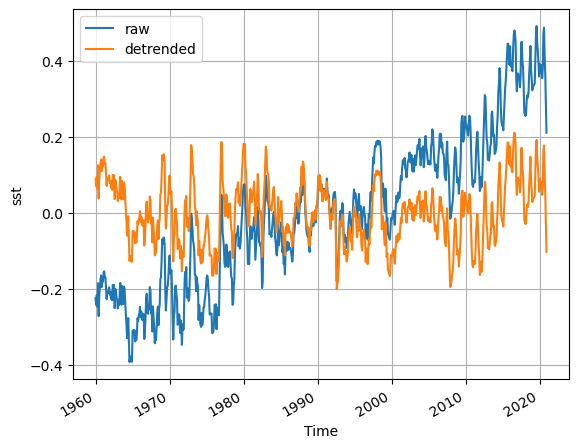

In [46]:
sst_anom.mean(dim=['lon', 'lat']).plot(label='raw')
sst_anom_detrended.mean(dim=['lon', 'lat']).plot(label='detrended')
plt.grid()
plt.legend()

In [47]:
ds_raw=sst_anom.mean(dim=['lon', 'lat'])
ds_detrend=sst_anom_detrended.mean(dim=['lon', 'lat'])

xtime=sst_anom['time']
nt=len(xtime)
xts=np.arange(0, nt, 1)
ds_raw

<xarray.DataArray 'sst' (time: 732)>
array([-2.24409580e-01, -2.42298588e-01, -2.16344059e-01, -2.47331142e-01,
       -1.84645519e-01, -2.71243602e-01, -2.16660157e-01, -1.94516748e-01,
       -1.74407989e-01, -1.64716750e-01, -1.94846928e-01, -1.74885020e-01,
       -1.80657431e-01, -1.56256691e-01, -1.53432146e-01, -1.70437187e-01,
       -1.68780625e-01, -1.97083071e-01, -2.26792336e-01, -2.07946628e-01,
       -2.09983706e-01, -2.03688011e-01, -1.95821404e-01, -2.14361161e-01,
       -2.10269973e-01, -2.26103008e-01, -2.06876338e-01, -2.29313970e-01,
       -1.89333633e-01, -2.10955501e-01, -1.89078033e-01, -2.50221044e-01,
       -1.99809834e-01, -2.04868183e-01, -2.23729402e-01, -2.26551384e-01,
       -2.51156539e-01, -2.38733962e-01, -2.41838604e-01, -2.19220579e-01,
       -1.84088424e-01, -2.01111212e-01, -2.41530806e-01, -1.92326203e-01,
       -2.31833234e-01, -2.39369616e-01, -1.93503946e-01, -1.98824301e-01,
       -2.33404353e-01, -2.65594214e-01, -2.88016140e-01, -3.29185247e-01,
       -3.03883523e-01, -2.76473850e-01, -3.32000762e-01, -3.91828269e-01,
       -3.80047858e-01, -3.77475679e-01, -3.90760988e-01, -3.91114622e-01,
       -3.10461372e-01, -3.08150142e-01, -3.18823278e-01, -3.07974428e-01,
       -3.37790281e-01, -3.11166108e-01, -3.34719062e-01, -3.15477043e-01,
       -2.76608318e-01, -2.84166843e-01, -2.69584119e-01, -2.64822692e-01,
       -2.46802002e-01, -2.74150848e-01, -2.59079278e-01, -2.63432592e-01,
       -2.81620085e-01, -2.76166826e-01, -2.65948415e-01, -3.31127822e-01,
...
        3.50939363e-01,  2.77713865e-01,  2.39771217e-01,  2.29747042e-01,
        2.30482653e-01,  2.16975421e-01,  2.50400215e-01,  2.89661944e-01,
        3.27539504e-01,  3.47709894e-01,  3.80688637e-01,  4.10689056e-01,
        4.44420636e-01,  4.43731993e-01,  4.06604439e-01,  3.88743460e-01,
        4.37288642e-01,  3.85421693e-01,  3.94434988e-01,  3.74459237e-01,
        3.72200191e-01,  4.33451742e-01,  4.67310131e-01,  4.78949249e-01,
        4.69936579e-01,  4.49019015e-01,  3.49870980e-01,  3.18933457e-01,
        3.62260371e-01,  3.66297603e-01,  3.58876199e-01,  3.54560047e-01,
        3.29826862e-01,  3.60141248e-01,  4.46509123e-01,  4.49391693e-01,
        3.95704716e-01,  3.83563131e-01,  3.31541002e-01,  2.63718784e-01,
        2.60145247e-01,  2.54341930e-01,  2.63286859e-01,  2.96775341e-01,
        3.08491945e-01,  3.02630663e-01,  3.18407536e-01,  3.64980400e-01,
        3.97091120e-01,  4.38134938e-01,  3.77211809e-01,  3.53434741e-01,
        3.21725577e-01,  3.30406517e-01,  3.33467185e-01,  3.37047100e-01,
        3.39803576e-01,  4.10906106e-01,  4.67224687e-01,  4.90527391e-01,
        4.45940405e-01,  4.24517363e-01,  3.94186050e-01,  3.58141810e-01,
        3.91344965e-01,  3.66664529e-01,  3.77533317e-01,  3.87927502e-01,
        3.53873461e-01,  3.78786594e-01,  4.71776992e-01,  4.86141711e-01,
        4.14439589e-01,  3.65402579e-01,  2.83588618e-01,  2.10370749e-01],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2020-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [48]:
s_raw, i_raw, r_raw, p_raw, e_raw = linregress(xts, ds_raw )
s_detrend, i_detrend, r_detrend, p_detrend, e_detrend = linregress(xts, ds_detrend )

In [49]:
p_raw
rsq_raw=round(r_raw**2,2)
rsq_raw

0.84

In [50]:
p_detrend
rsq_detrend=round(r_detrend**2,2)
rsq_detrend

0.0

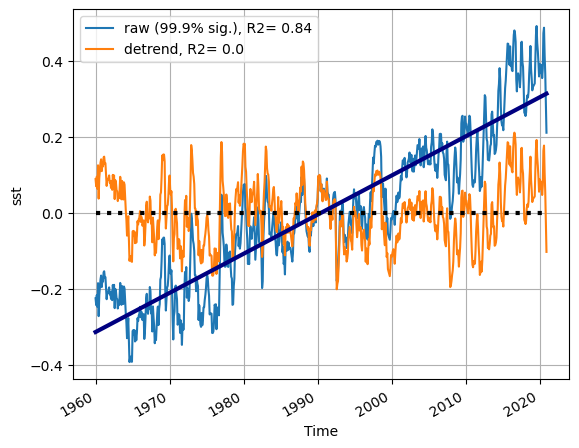

In [51]:
sst_anom.mean(dim=['lon', 'lat']).plot(label='raw')
sst_anom_detrended.mean(dim=['lon', 'lat']).plot(label='detrended')
plt.plot(xtime, i_raw + s_raw*xts,color='navy',linewidth=3,linestyle='solid')
plt.plot(xtime, i_detrend + s_detrend*xts,color='black',linewidth=3,linestyle="dotted")
plt.grid()

string_raw = f"raw (99.9% sig.), R2= {rsq_raw}"
string_detrend = f"detrend, R2= {rsq_detrend}"

plt.legend([string_raw,string_detrend])


The application of Regression map

In [52]:
#read nino3.4 index
ds_oni = xr.open_dataset("ENSOindex.oni.1960-2020.nc")
ds_oni = ds_oni.sel(time=slice('1979', '2019'))

#read SST
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds_sst = xr.open_dataset(url)
ds_sst = ds_sst.sel(time=slice('1979', '2019'))
ds_sst.load()
#ds_sst

#read precipitation
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/gpcp/precip.mon.mean.nc'
ds_prec = xr.open_dataset(url)
ds_prec = ds_prec.sel(time=slice('1979', '2019'))
ds_prec.load()
ds_prec

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, time: 492, nv: 2)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-01-01
    lat_bnds   (lat, nv) float32 -90.0 -87.5 -87.5 -85.0 ... 85.0 87.5 87.5 90.0
    lon_bnds   (lon, nv) float32 0.0 2.5 2.5 5.0 5.0 ... 355.0 357.5 357.5 360.0
    precip     (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.1305 0.1327 0.1341
Attributes: (12/20)
    Conventions:                     CF-1.0
    curator:                         Dr. Jian-Jian Wang\nESSIC, University of...
    citation:                        Adler, R.F., G.J. Huffman, A. Chang, R. ...
    title:                           GPCP Version 2.3 Combined Precipitation ...
    platform:                        NOAA POES (Polar Orbiting Environmental ...
    source_obs:                      CDR RSS SSMI/SSMIS Tbs over ocean \nCDR ...
    ...                              ...
    NCO:                             4.6.9
    history:                         Generated at NOAA/ESRL PSD Sep 9 2016 ba...
    References:                      http://www.psl.noaa.gov/data/gridded/dat...
    _NCProperties:                   version=2,netcdf=4.7.3,hdf5=1.10.6,
    data_comment:                    Interim data covers 2023/01 through latest.
    DODS_EXTRA.Unlimited_Dimension:  time

In [53]:
ds_climo=ds_prec.groupby('time.month').mean()
ds_anoms=ds_prec.groupby('time.month')-ds_climo
ds_anoms

<xarray.Dataset>
Dimensions:   (lat: 72, lon: 144, time: 492, nv: 2)
Coordinates:
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon       (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time      (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
    month     (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (time, lat, nv) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    lon_bnds  (time, lon, nv) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    precip    (time, lat, lon) float32 -0.02191 -0.03154 ... -0.2816 -0.2292

In [54]:
nx=len(ds_anoms['lon'])
ny=len(ds_anoms['lat'])

p_array=np.zeros((ny,nx))
r_array=np.zeros((ny,nx))
m_array=np.zeros((ny,nx))

for i in range(nx):
    for j in range(ny):
        
        x=ds_oni['sst']
        y=ds_anoms['precip'][:,j,i]
        
        m,b,r,p,e = linregress(x,y)
        
        m_array[j,i]=m
        r_array[j,i]=r
        p_array[j,i]=p

In [55]:
#mask
mask_sig=np.where(p_array<0.05,m_array,np.nan)

Text(0.5, 1.0, 'Regression between Nino3.4 and Precipitation Anomalies')

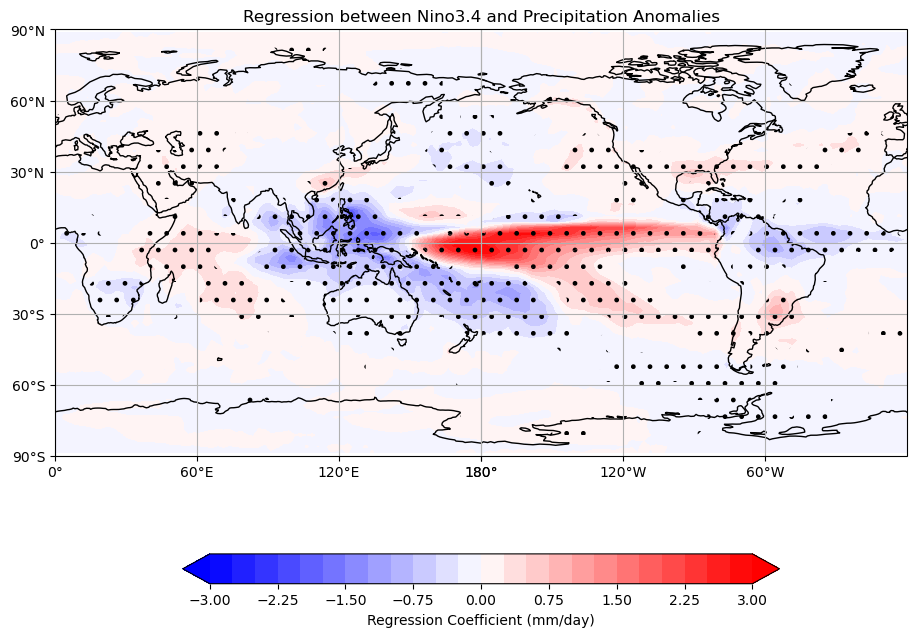

In [56]:
#plotting
clevs=np.arange(-3,3.25,0.25)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=m_array
data,lon=add_cyclic_point(data,coord=ds_anoms['lon'])
mask_data,lons=add_cyclic_point(mask_sig,coord=ds_anoms['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,ds_anoms['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

ax.contourf(lon,ds_anoms['lat'],mask_data,[0,1],
            transform = ccrs.PlateCarree(),colors='None',
            hatches=['.','.'],extend='both',alpha=0)

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (mm/day)')

# Add title
plt.title('Regression between Nino3.4 and Precipitation Anomalies')

#SKlearn

conda install -c intel scikit-learn

In [57]:

#!pip install sklearn
from sklearn.linear_model import LinearRegression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
model=LinearRegression()
model.fit(xts[:, np.newaxis], ds_raw)
print('intercept:',model.intercept_)
print('coefficient:',model.coef_)

intercept: -0.3129470075190998
coefficient: [0.00085622]


In [58]:
## 迴歸模型的準確度
score = model.score(xts[:, np.newaxis], ds_raw)
print('Score: ', score)
print('Accuracy: ' + str(score*100) + '%')

Score:  0.8359707728997511
Accuracy: 83.5970772899751%


In [59]:
y_pred = model.predict(xts[:, np.newaxis])
print('Predict : ', y_pred)

Predict :  [-0.31294701 -0.31209079 -0.31123457 -0.31037836 -0.30952214 -0.30866592
 -0.30780971 -0.30695349 -0.30609727 -0.30524106 -0.30438484 -0.30352863
 -0.30267241 -0.30181619 -0.30095998 -0.30010376 -0.29924754 -0.29839133
 -0.29753511 -0.29667889 -0.29582268 -0.29496646 -0.29411024 -0.29325403
 -0.29239781 -0.29154159 -0.29068538 -0.28982916 -0.28897294 -0.28811673
 -0.28726051 -0.28640429 -0.28554808 -0.28469186 -0.28383564 -0.28297943
 -0.28212321 -0.28126699 -0.28041078 -0.27955456 -0.27869834 -0.27784213
 -0.27698591 -0.2761297  -0.27527348 -0.27441726 -0.27356105 -0.27270483
 -0.27184861 -0.2709924  -0.27013618 -0.26927996 -0.26842375 -0.26756753
 -0.26671131 -0.2658551  -0.26499888 -0.26414266 -0.26328645 -0.26243023
 -0.26157401 -0.2607178  -0.25986158 -0.25900536 -0.25814915 -0.25729293
 -0.25643671 -0.2555805  -0.25472428 -0.25386806 -0.25301185 -0.25215563
 -0.25129941 -0.2504432  -0.24958698 -0.24873076 -0.24787455 -0.24701833
 -0.24616212 -0.2453059  -0.24444968 -0.

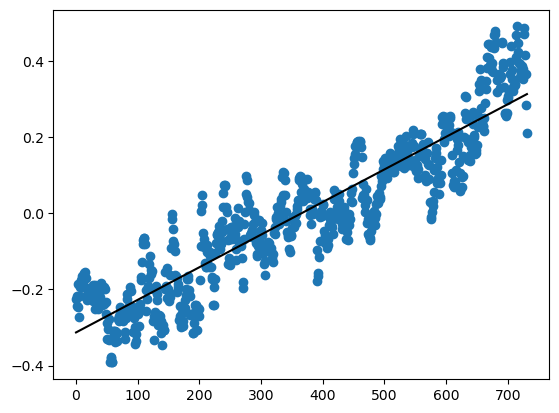

In [60]:
plt.scatter(xts,ds_raw)
plt.plot(xts,y_pred,'k-')